# Football: Can you guess the winner?

UGE: M2 SIA - ML Project Report

Luca Uckermann [](https://orcid.org/0009-0005-2957-6331) (University of Applied Sciences (TH Köln))  
Nikethan Nimalakumaran (Université Gustave Eiffel)  
Jonas Möller (Bielefeld University)  
January 15, 2025

Abstract

# 1. Introduction & Problem Understanding

## 1.1 Context and Motivation

This report explores the use of machine learning to predict football match outcomes (home win, draw or away win) based on historical team and player statistics. The ability to create accurate predictive models can significantly benefit stakeholders such as sports analysts, bettors and team managers by providing valuable insight into potential match outcomes.

## 1.2 Objectives

The primary objective of this project is to build a robust prediction model capable of determining the outcome of football matches using real historical data. This model should generalize across leagues, divisions and competitive levels, ensuring consistent performance across different match scenarios.

Secondary objectives include:

-   Evaluate the effectiveness of different machine learning techniques on sports data.
-   Identify the most influential features that drive match outcomes.
-   Provide actionable insights and lessons learned for future sports analytics projects.

## 1.3 Challenge Description

The challenge from QTR ([Technologies Group 2024](#ref-challengedata143)) provides a rich dataset comprising football match data from numerous leagues around the world. The entire dataset is divided into two categories: *team* and *player* statistics. The first category contains *25* features, while the second contains *52* features. The provided data is aggregated by sum, average and standard deviation. The ultimate goal is to predict match results, represented as a vector: `[HOME_WINS, DRAW, AWAY_WINS]`. The data can be found on the Challenge Data platform ([Data 2024](#ref-challengedata)). Two benchmarks are provided: a simple “home win” prediction with an accuracy of *44%* and a gradient boosting tree model with an accuracy of *47.5%*.

Several challenges inherent in this dataset include:

-   **Class Imbalance:** Matches are not evenly distributed across home wins, draws and away wins, potentially biasing models.
-   **Data Heterogeneity:** Leagues vary significantly in playing style, player skill and game dynamics.
-   **Feature Complexity:** The dataset contains a mix of team and player statistics, requiring effective feature selection and engineering.
-   **Limited Test Information:** No labels are provided for the test set, making it difficult to evaluate model performance.

# 2. Data Exploration & Preprocessing

## 2.1 Dataset Overview

The dataset provided for this project includes football match statistics aggregated at both team and player levels, with separate data for home and away teams. The data is structured into four CSV files for home and away teams and players, along with two additional files containing the target labels. These labels represent match outcomes as one of three categories: home win, draw, or away win. The aim is to leverage this rich dataset to build a machine learning model capable of predicting match outcomes with high accuracy. The training dataset contains **12,303 rows** and **884 features**, comprising the given data. Each row corresponds to a match, and the target variable represents the match outcome as one of three classes: `HOME_WINS`, `DRAW`, or `AWAY_WINS`, encoded as `[0, 1, 2]`.

The target class distribution is imbalanced, with **43.5% home wins**, **30.6% away wins**, and **25.9% draws**. This imbalance required careful handling during the model training phase to prevent biased predictions towards the majority class.

### 2.1.1 Exploratory Data Analysis (EDA)

#### 2.1.1.1 Key Feature Statistics

A quick summary of the training dataset revealed meaningful patterns in team performance metrics. The table below highlights the statistics for the top 10 features:

| **Feature** | **Count** | **Mean** | **Std Dev** | **Min** | **25%** | **50%** | **75%** | **Max** |
|-------------------------|-------|------|--------|------|------|------|------|------|
| home_TEAM_SHOTS_TOTAL_season_sum | 12,303 | 4.30 | 2.91 | 0.0 | 2.0 | 4.0 | 6.0 | 10.0 |
| home_TEAM_SHOTS_INSIDEBOX_season_sum | 12,303 | 3.82 | 3.07 | 0.0 | 1.0 | 3.0 | 6.0 | 10.0 |
| home_TEAM_SHOTS_OFF_TARGET_season_sum | 12,303 | 4.51 | 2.81 | 0.0 | 2.0 | 4.0 | 6.0 | 10.0 |
| home_TEAM_SHOTS_ON_TARGET_season_sum | 12,303 | 4.15 | 2.86 | 0.0 | 2.0 | 4.0 | 6.0 | 10.0 |
| home_TEAM_SHOTS_OUTSIDEBOX_season_sum | 12,303 | 4.01 | 3.04 | 0.0 | 1.0 | 4.0 | 6.0 | 10.0 |
| home_TEAM_PASSES_season_sum | 12,303 | 3.85 | 3.07 | 0.0 | 1.0 | 3.0 | 6.0 | 10.0 |
| home_TEAM_SUCCESSFUL_PASSES_season_sum | 12,303 | 3.67 | 3.03 | 0.0 | 1.0 | 3.0 | 6.0 | 10.0 |
| home_TEAM_SAVES_season_sum | 12,303 | 4.38 | 3.00 | 0.0 | 2.0 | 4.0 | 7.0 | 10.0 |
| home_TEAM_CORNERS_season_sum | 12,303 | 4.50 | 2.80 | 0.0 | 2.0 | 4.0 | 6.0 | 10.0 |
| home_TEAM_FOULS_season_sum | 12,303 | 4.82 | 3.02 | 0.0 | 3.0 | 5.0 | 7.0 | 10.0 |

Table 1: Summary statistics for the top 10 features in the training dataset.

<a href="#tbl-feature-stats" class="quarto-xref">Table 1</a> highlights the variability in team performance metrics, such as shots and passes, which are critical indicators for match outcomes.

#### 2.1.1.2 Class Distribution

The class distribution, as shown in the plot below, reveals a significant imbalance in match outcomes:

| **Class**     | **Count** | **Proportion** |
|---------------|-----------|----------------|
| Home Wins (0) | 5,356     | 43.5%          |
| Away Wins (2) | 3,761     | 30.6%          |
| Draws (1)     | 3,186     | 25.9%          |

Table 2: Class distribution of match outcomes in the training dataset.

<figure id="fig-class-distribution">
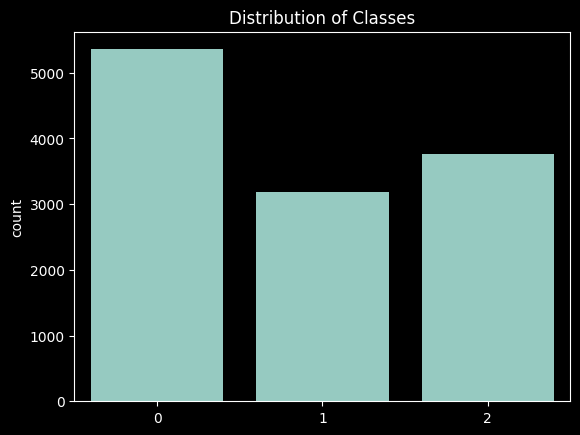
<figcaption>Figure 1: Class Distribution</figcaption>
</figure>

The imbalance in target classes (see <a href="#tbl-class-distribution" class="quarto-xref">Table 2</a> and <a href="#fig-class-distribution" class="quarto-xref">Figure 1</a>) necessitated the use of stratified sampling during train-test splits to ensure fair representation of all classes.

Following the initial exploration of class imbalance in the dataset, we conducted a deeper analysis of certain features to assess their behavior and potential influence on match outcomes. This analysis aimed to provide a clearer understanding of the data’s structure and implications.

### 2.1.2 Correlation Analysis for Player Metrics

The first heatmap (<a href="#fig-player-correlation" class="quarto-xref">Figure 2</a>) visualizes the correlation matrix of selected **home player statistics**, highlighting the relationships between features such as accurate crosses, aerials won, assists, and big chances created. A moderate correlation is observed between **big chances created** and **assists** (0.70), as well as between **accurate crosses** and **big chances created** (0.56). These relationships suggest that these metrics may jointly influence a team’s success, warranting their consideration in the feature engineering process.

<figure id="fig-player-correlation">
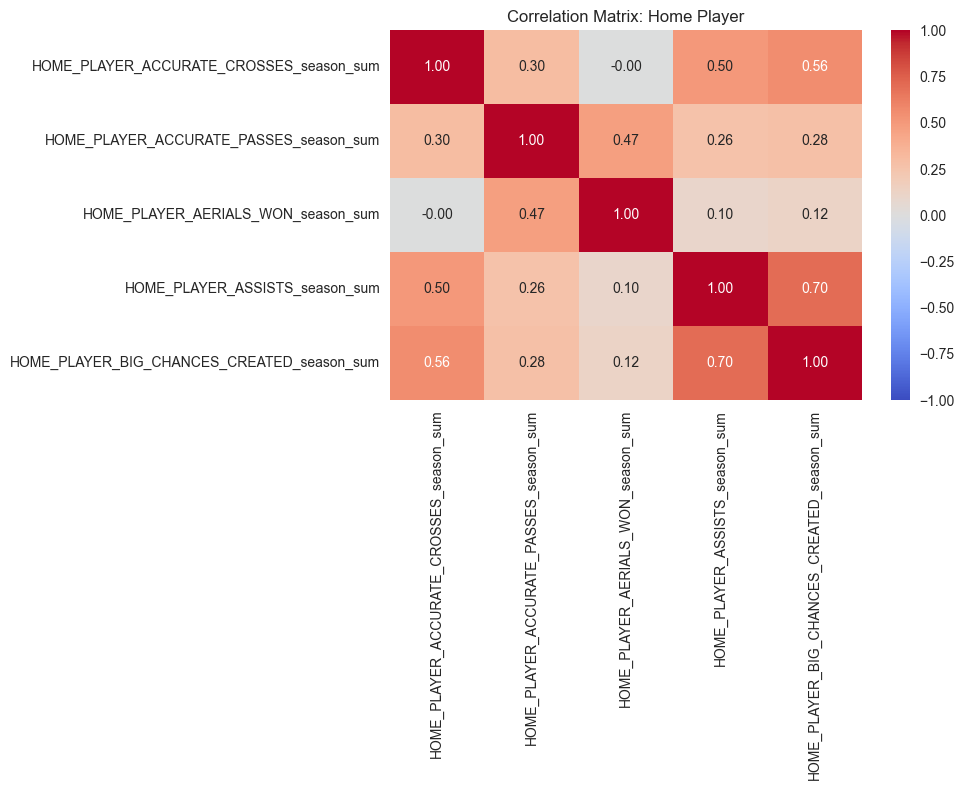
<figcaption>Figure 2: Correlation Matrix: Home Player</figcaption>
</figure>

### 2.1.3 Feature Distributions and Correlations with Outcomes

**?@fig-feature-distribution** and **?@fig-feature-correlation** illustrate the distributions of selected **home team statistics** (e.g., **shots total**, **shots inside the box**, **passes**, and **successful passes**) and their correlations with the **home wins** target class. Key observations include:

1.  **Feature Distributions:** The distributions for metrics such as **shots total** and **successful passes** exhibit peaks at discrete values, reflecting their aggregation across matches. It can also be seen that of the selected metrics, the sum of shots a team made inside the box correlated most strongly with a home win.

2.  **Correlations:** The positive correlations between these features and **home wins** reinforce their potential importance in predicting match outcomes. For instance, metrics like **shots inside the box** have a notable correlation of approximately 0.2 with **home wins**, indicating their predictive relevance.

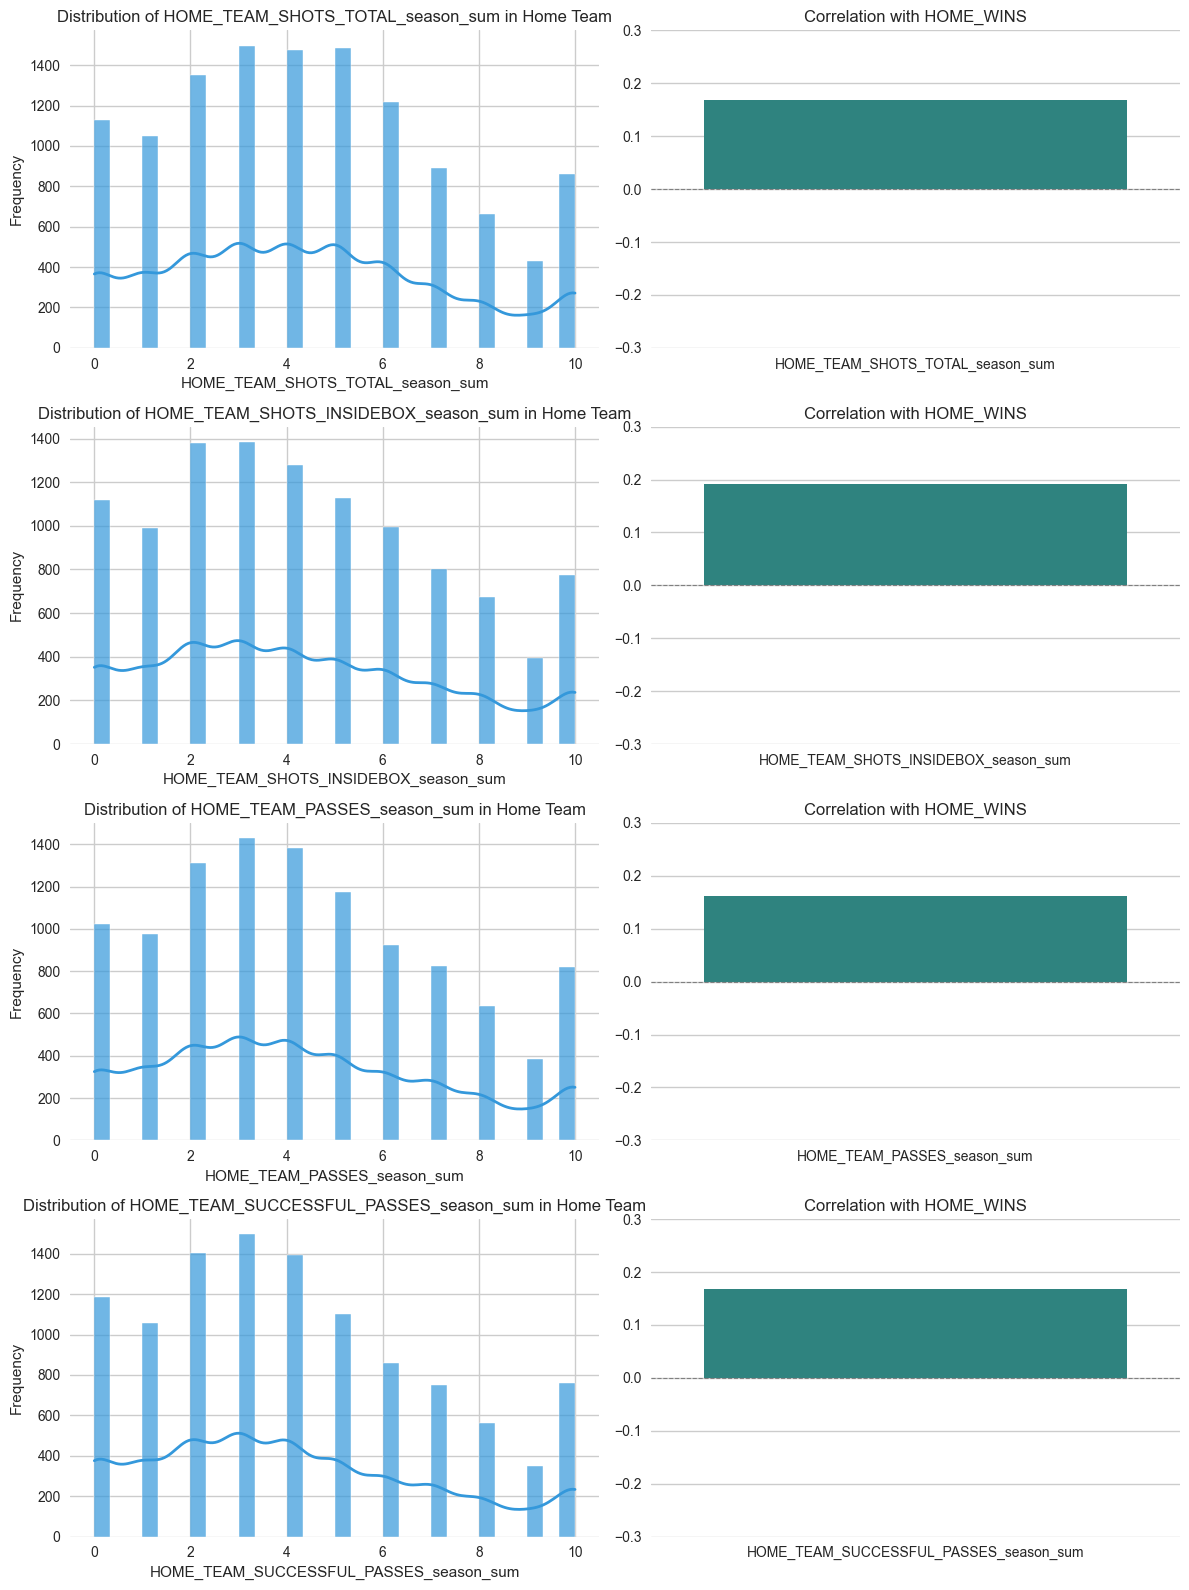 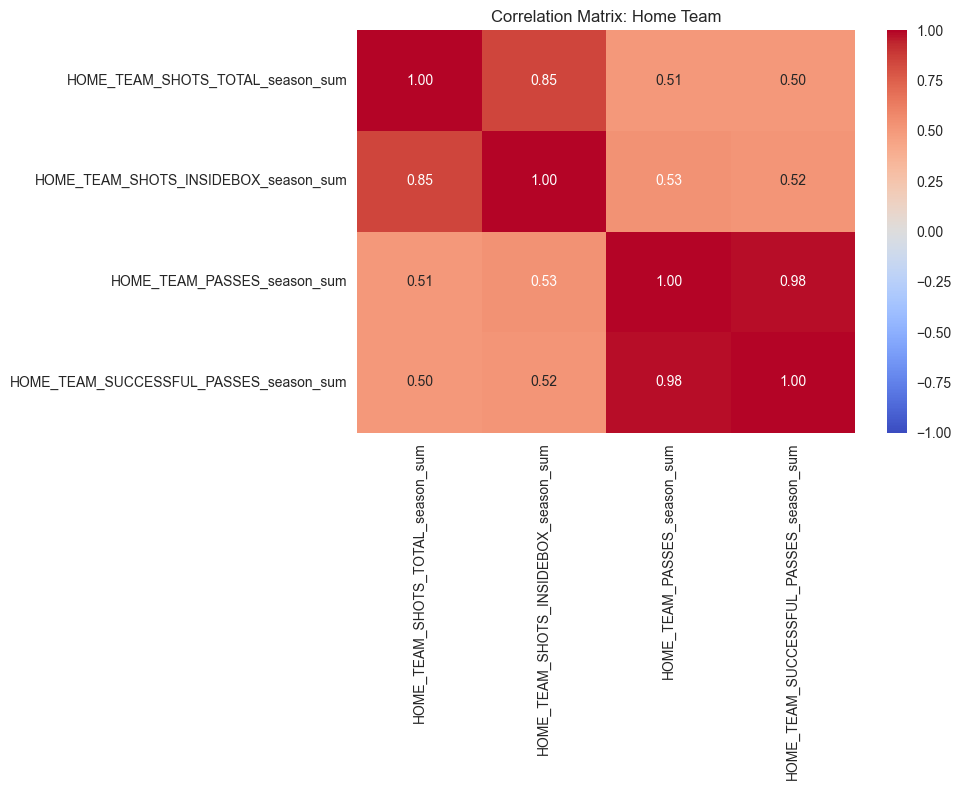

### 2.1.4 Implications for Feature Engineering

The insights from these analyses informed our feature engineering efforts by:

-   Identifying key metrics with strong correlations to match outcomes.
-   Justifying the creation of **difference** and **ratio** features to capture the interplay between home and away team statistics.
-   Highlighting the importance of preserving the integrity of correlated features, such as **big chances created** and **assists**, during possible dimensionality reduction.

Based on this we can ensure that relevant and impactful features are retained for the subsequent modelling phases.

### 2.1.5 Data Cleaning

During preprocessing, missing values in player statistics, such as `PLAYER_CAPTAIN`, were replaced with zeros. Aggregated player data was further combined with team statistics, ensuring a consistent structure for all matches. Outliers in features like `TEAM_SHOTS_TOTAL` were retained to preserve their influence on match outcomes. In addition, columns that were not used in the test data, such as the league or player names were dropped.

### 2.1.6 Feature Engineering

To enhance model performance, new features were engineered:

1.  **Difference Features:** Captured the performance disparity between home and away teams (e.g., `SHOTS_TOTAL_DIFF`).
2.  **Ratio Features:** Quantified proportional differences between home and away metrics (e.g., `SHOTS_TOTAL_RATIO`).

These engineered features were critical in distinguishing competitive advantages, especially in closely matched games.

## 2.2 Methodological Approaches with Pros & Cons

### 2.2.1 Logistic Regression

**Overview:** Logistic Regression is a statistical model that is widely used for binary classification problems. It estimates the probability of an event occurring by fitting data to a logistic curve. For multiclass problems, extensions like multinomial logistic regression are employed.

**Advantages:**

-   Simple and easy to interpret, making it ideal for understanding feature importance ([Hosmer, Lemeshow, and Sturdivant 2013](#ref-Hosmer2013)).
-   Computationally efficient with minimal assumptions about data distribution.
-   Well-suited for smaller datasets with linearly separable features.

**Disadvantages:**

-   Assumes linearity between predictors and the log-odds, which can limit performance on non-linear data ([Hosmer, Lemeshow, and Sturdivant 2013](#ref-Hosmer2013)).
-   Prone to underfitting when dealing with complex or high-dimensional datasets.

------------------------------------------------------------------------

### 2.2.2 Random Forest

**Overview:**  
Random Forest is an ensemble learning method that constructs multiple decision trees and combines their predictions. It leverages the concept of “bagging” to improve predictive accuracy and control overfitting.

**Advantages:**

-   Handles non-linear relationships and interactions effectively ([Breiman 2001](#ref-Breiman2001)).
-   Robust to overfitting due to averaging across trees.
-   Automatically ranks feature importance, providing insights into the data.

**Disadvantages:**

-   Computationally intensive, especially for large datasets or many trees ([Breiman 2001](#ref-Breiman2001)).
-   Less interpretable than simpler models like Logistic Regression.

------------------------------------------------------------------------

### 2.2.3 XGBoost

**Overview:**  
XGBoost is an advanced implementation of gradient boosting designed for speed and efficiency. It builds trees iteratively, focusing on optimizing predictive accuracy through regularization and advanced optimization techniques.

**Advantages:**

-   Achieves state-of-the-art predictive performance on structured datasets ([Chen and Guestrin 2016](#ref-Chen2016)).
-   Regularization controls overfitting better than traditional gradient boosting.
-   Flexible with custom loss functions and supports parallel processing.

**Disadvantages:**

-   Requires extensive hyperparameter tuning, which can be computationally expensive ([Chen and Guestrin 2016](#ref-Chen2016)).
-   Interpretability can be challenging without additional tools.

------------------------------------------------------------------------

### 2.2.4 LightGBM

**Overview:**  
LightGBM (Light Gradient Boosting Machine) is a fast and efficient gradient boosting framework designed for large-scale datasets. It optimizes both accuracy and scalability by leveraging histogram-based learning.

**Advantages:**

-   Significantly faster training and lower memory usage compared to XGBoost ([Ke et al. 2017](#ref-Ke2017)).
-   Handles large datasets and sparse features effectively ([Ke et al. 2017](#ref-Ke2017)).
-   Implements advanced techniques like Leaf-wise growth for higher accuracy.

**Disadvantages:**

-   Prone to overfitting, particularly on smaller datasets ([Ke et al. 2017](#ref-Ke2017)).
-   Requires careful tuning to achieve optimal performance.

------------------------------------------------------------------------

## 2.3 Comparison of Models

| **Model** | **Advantages** | **Disadvantages** | **Best Use Cases** |
|------|--------------------------|---------------------|---------------------|
| Logistic Regression | \- Simple and interpretable ([Hosmer, Lemeshow, and Sturdivant 2013](#ref-Hosmer2013)). | \- Assumes linear relationships; struggles with complex, non-linear data ([Hosmer, Lemeshow, and Sturdivant 2013](#ref-Hosmer2013)). | \- Small datasets with linearly separable features or where interpretability is critical. |
| Random Forest | \- Captures non-linear relationships; robust to overfitting; handles categorical data well ([Breiman 2001](#ref-Breiman2001)). | \- Computationally intensive; less interpretable compared to simpler models ([Breiman 2001](#ref-Breiman2001)). | \- Medium to large datasets with diverse features; identifying important variables. |
| XGBoost | \- High predictive performance; regularization to reduce overfitting; supports custom loss functions ([Chen and Guestrin 2016](#ref-Chen2016)). | \- Hyperparameter tuning is computationally expensive; less interpretable ([Chen and Guestrin 2016](#ref-Chen2016)). | \- Competitions or tasks requiring high accuracy and scalability. |
| LightGBM | \- Fast and efficient; handles large-scale datasets; optimized for sparse data ([Ke et al. 2017](#ref-Ke2017)). | \- Can overfit on small datasets; requires careful hyperparameter tuning ([Ke et al. 2017](#ref-Ke2017)). | \- Large, high-dimensional datasets or tasks involving sparse features. |

Table 3: Comparison of key advantages, disadvantages, and best use cases for Logistic Regression, Random Forest, XGBoost, and LightGBM.

# 3. Model Selection, Tuning & Validation

## 3.1 Hyperparameter Tuning Strategy

To optimize model performance, we employed hyperparameter tuning using RandomizedSearchCV, a method that allows efficient exploration of hyperparameter spaces. Unlike exhaustive grid search, this approach samples a predefined number of configurations, significantly reducing computational cost while maintaining robust optimization.

The training dataset was split into training and validation subsets using stratified sampling to preserve the class distribution. First, a subset of the data (5% sample) was used for initial tuning to save computational resources, and the best singular model was retrained on the whole dataset. In a subsequent iteration of our modeling phase, we decided to perform hyperparameter tuning on the entire dataset and then train all models on the dataset. This is mainly due to the fact that after our first submission, the difference between our accuracy on the validation set and the final score from the challenge did not match well.

Below is the Python implementation of the hyperparameter tuning process:

``` python
# Define models and parameter distributions
models = {
    "LogisticRegression": {
        "estimator": LogisticRegression(max_iter=2000, solver="lbfgs", n_jobs=-1),
        "param_dist": {
            "C": loguniform(1e-2, 1e1)
        }
    },
    "RandomForest": {
        "estimator": RandomForestClassifier(random_state=42, n_jobs=-1),
        "param_dist": {
            "n_estimators": randint(50, 300),
            "max_depth": randint(3, 15)
        }
    },
    "XGBClassifier": {
        "estimator": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="mlogloss", n_jobs=-1),
        "param_dist": {
            "n_estimators": randint(50, 300),
            "max_depth": randint(3, 15),
            "learning_rate": loguniform(1e-3, 1e-1)
        }
    },
    "LGBMClassifier": {
        "estimator": LGBMClassifier(random_state=42, n_jobs=-1),
        "param_dist": {
            "n_estimators": randint(50, 300),
            "max_depth": randint(3, 15),
            "learning_rate": loguniform(1e-3, 1e-1)
        }
    }
}

# Number of random iterations for hyperparameter search
n_iter_search = 20
results = {}

# Perform hyperparameter tuning
for name, cfg in models.items():
    print(f"Tuning {name} with RandomizedSearchCV...")
    clf = cfg["estimator"]
    param_dist = cfg["param_dist"]

    rs = RandomizedSearchCV(
        estimator=clf,
        param_distributions=param_dist,
        n_iter=n_iter_search,
        scoring="accuracy",
        cv=3,
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    rs.fit(X_train_s, y_train_s)
    best_model = rs.best_estimator_
    val_preds = best_model.predict(X_val_s)
    acc = accuracy_score(y_val_s, val_preds)
    f1 = f1_score(y_val_s, val_preds, average="macro")

    results[name] = {
        "best_params": rs.best_params_,
        "accuracy": acc,
        "f1_score": f1,
        "best_estimator": best_model
    }
    print(f"{name} tuned. Accuracy: {acc:.4f}, F1 Score: {f1:.4f}\n")
```

## 3.2 Validation Framework

To ensure robust evaluation, we employed k-fold cross-validation with three folds. This approach allowed us to test model performance across multiple data splits, reducing the risk of overfitting and providing a more reliable assessment of generalization. Stratified sampling was used to maintain the original class distribution in each fold, preventing biases caused by class imbalance.

## 3.3 Performance Metrics

To evaluate the models, we relied on two primary metrics:

1.  **Accuracy:** The proportion of correctly predicted outcomes out of the total predictions. While accuracy provides a general sense of model performance, it can be misleading in cases of imbalanced datasets like ours, where certain outcomes dominate.

2.  **F1 Score (Macro Average):** This metric considers the harmonic mean of precision and recall for all classes, treating them equally regardless of their frequency. The macro-average F1 score is particularly important for this project to ensure that the model performs well across all classes (Home Wins, Draws, and Away Wins).

Additionally, confusion matrices were used to provide a detailed breakdown of predictions versus actual outcomes, highlighting strengths and weaknesses for each class.

## 3.4 Results of Hyperparameter Tuning

The table below summarizes the performance metrics for each model after hyperparameter tuning using the validation set:

| **Model** | **Accuracy** | **F1 Score (Macro)** | **Best Hyperparameters** |
|-------------|--------|-------------|---------------------------------------|
| Logistic Regression | 0.463 | 0.410 | `{'C': 0.115}` |
| Random Forest | 0.505 | 0.0368 | `{'n_estimators': 10, 'max_depth': 201}` |
| XGBoost | 0.498 | 0.0363 | `{'n_estimators': 181, 'max_depth': 4, 'learning_rate': 0.008}` |
| LightGBM | 0.503 | 0.0372 | `{'n_estimators': 180, 'max_depth': 11, 'learning_rate': 0.011}` |

Table 4: Results of hyperparameter tuning for Logistic Regression, Random Forest, XGBoost, and LightGBM models.

These are the results for the hyperparameter tuning, <a href="#tbl-hyperparameter-tuning" class="quarto-xref">Table 4</a> shows the model with the corresponding accuracy and F1 score and the best parameters. After the hyperparameter tuning, we trained those models with the best parameters on the whole dataset.

# 4. Final Chosen Solution & In-Depth Analysis

## 4.1 Best Performing Approach

After training the models on the full dataset and evaluating their performance both on a held-out validation set and the competition platform, the **Random Forest** emerged as the best-performing model with a competitive accuracy of **0.4879** on the challenge leaderboard. While other models such as XGBoost and LightGBM also performed reasonably well, Random Forest demonstrated better generalization and robustness when applied to unseen test data. It ranked **279 out of 832 submissions**, placing it significantly above the baseline model.

## 4.2 In-Depth Model Evaluation

### 4.2.1 Logistic Regression

Logistic Regression, despite its simplicity, struggled to capture the non-linear relationships in the data. Its accuracy on the validation set was **45%**, and its performance on the challenge platform was slightly lower at **43.28%**. The model demonstrated a preference for the majority class (Home Wins) but struggled with minority classes (Draws and Away Wins). The confusion matrix (<a href="#fig-logistic-regression-confusion-matrix" class="quarto-xref">Figure 3</a>) revealed an imbalance in predictions, particularly for the Draw class, which significantly reduced its macro F1-score.

<figure id="fig-logistic-regression-confusion-matrix">
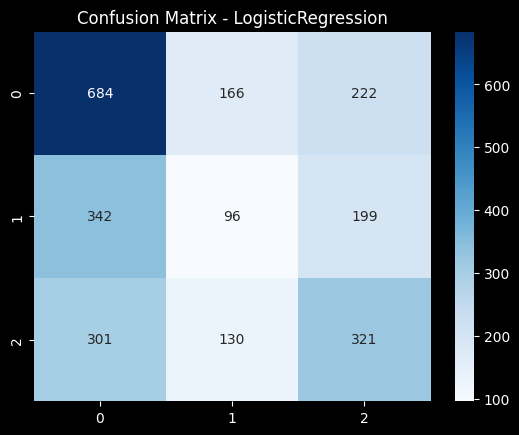
<figcaption>Figure 3: Confusion Matrix Logistic Regression</figcaption>
</figure>

### 4.2.2 Random Forest

Random Forest achieved a validation accuracy of **49%** and maintained this level of performance on the challenge platform with an accuracy of **48.79%**. The confusion matrix (<a href="#fig-random-forest-confusion-matrix" class="quarto-xref">Figure 4</a>) indicated that Random Forest effectively captured the majority class (Home Wins) while achieving reasonable performance for Away Wins. However, it showed limited success in predicting Draws, as evidenced by the low recall for this class.

Key strengths of Random Forest include its ability to model complex feature interactions and to provide consistent performance across datasets, making it a reliable choice for this task.

<figure id="fig-random-forest-confusion-matrix">
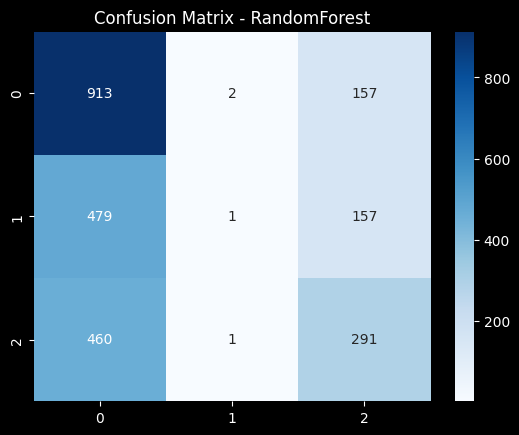
<figcaption>Figure 4: Confusion Matrix Random Forest</figcaption>
</figure>

### 4.2.3 XGBoost

XGBoost performed similarly to Random Forest on both the validation set and the challenge platform, achieving leaderboard accuracy of **48.49%**. While XGBoost excelled in handling imbalanced data through boosting iterations, its computational overhead and sensitivity to hyperparameter tuning posed challenges. Its confusion matrix (<a href="#fig-xgboost-confusion-matrix" class="quarto-xref">Figure 5</a>) revealed a similar pattern to Random Forest, with strong performance for Home Wins but weaker performance for Draws.

<figure id="fig-xgboost-confusion-matrix">
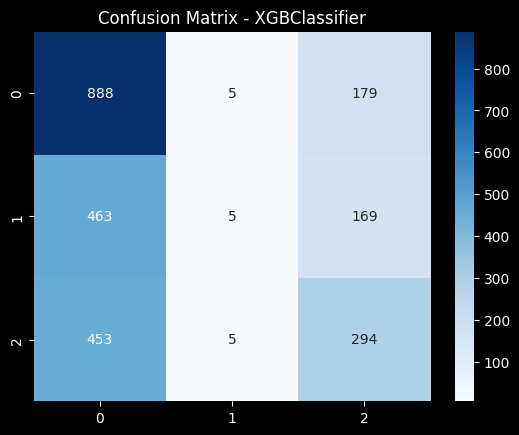
<figcaption>Figure 5: Confusion Matrix XGBoost</figcaption>
</figure>

### 4.2.4 LightGBM

LightGBM demonstrated competitive performance with a leaderboard accuracy of **48.48%**. Its efficiency in handling large-scale data and sparse features made it well-suited for this project. However, like XGBoost, it struggled to achieve high recall for the Draw class (<a href="#fig-lightgbm-confusion-matrix" class="quarto-xref">Figure 6</a>), leading to a lower macro F1-score. Despite these limitations, LightGBM’s fast training and inference times make it an attractive option for large-scale deployments.

<figure id="fig-lightgbm-confusion-matrix">
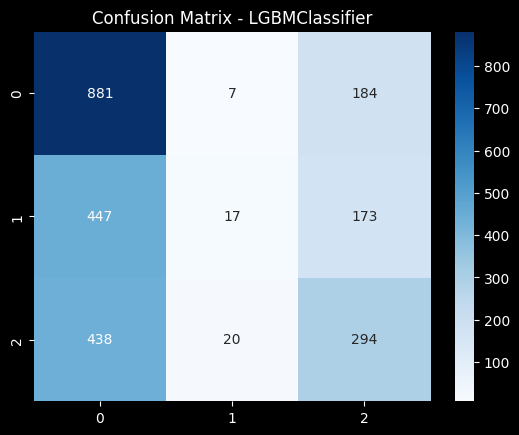
<figcaption>Figure 6: Confusion Matrix LightGBM</figcaption>
</figure>

### 4.2.5 Feature Engineering Insights

During the final training phase, we decided not to include the engineered **difference** and **ratio** features. This decision was based on validation results showing that the models performed better when only the original features were used. While these engineered features provided valuable insights during exploratory analysis, they may have introduced noise or redundant information that hindered model performance on the full dataset.

## 4.3 Validation and Leaderboard Results

| **Model** | **Validation Accuracy** | **Leaderboard Accuracy** | **Ranking** | **F1 Score (Macro)** |
|--------------|-----------------|------------------|---------|---------------|
| Logistic Regression | 45% | 43.28% | 770 | 0.40 |
| Random Forest | 49% | 48.79% | 279 | 0.35 |
| XGBoost | 48% | 48.49% | 464 | 0.35 |
| LightGBM | 48% | 48.48% | 470 | 0.36 |

Table 5: Validation and leaderboard results for Logistic Regression, Random Forest, XGBoost, and LightGBM models.

<a href="#tbl-validation-leaderboard-results" class="quarto-xref">Table 5</a> summarizes the performance of each model on the validation set and the challenge leaderboard.

## 4.4 Discussion of Results

The results highlight the challenges of accurately predicting football match outcomes due to the complexity and variability inherent in the sport. Despite these challenges, the models performed well compared to the baseline, with Random Forest achieving a notable improvement. However, all models struggled with the Draw class, likely due to its lower representation and more ambiguous nature in the dataset.

The primary takeaway from this analysis is the importance of feature selection in sports analytics. This includes not only identifying the most relevant features, but also determining when engineered features may not contribute positively to model performance.

## 4.5 Limitations

1.  **Class Imbalance:** The imbalance in the target variable significantly impacted model performance, particularly for Draw predictions.
2.  **Feature Representation:** Despite careful selection, the models may not fully capture the complex dynamics of football matches.
3.  **Leaderboard Gap:** The discrepancy between validation and leaderboard performance suggests potential overfitting or differences in test data distribution.

# 5. Conclusion & Lessons Learned

## 5.1 Key Insights

This project explored the use of machine learning techniques to predict football match outcomes, leveraging a dataset rich in team and player statistics. The results demonstrated that ensemble methods, particularly Random Forest, performed robustly on this complex task, achieving a leaderboard ranking significantly above the baseline. Key insights include:

-   **Feature Selection Matters:** The decision to exclude engineered features such as differences and ratios during final training proved beneficial, highlighting the importance of testing feature relevance comprehensively.
-   **Class Imbalance Is Challenging:** The imbalance in target classes, particularly the underrepresented Draw category, influenced the models’ ability to generalize, indicating the need for tailored handling of such scenarios in sports analytics.
-   **Model Complexity Balances:** Simpler models like Logistic Regression provided interpretability but struggled with the data’s non-linear relationships. In contrast, advanced ensemble methods such as Random Forest and XGBoost excelled in predictive performance.

## 5.2 Challenges Encountered

Several challenges were faced during this project:

1.  **Computational Complexity:** Attempts to create an enriched training dataset by applying Cartesian product operations were computationally prohibitive, limiting the exploration of more sophisticated feature combinations.
2.  **Limited Additional Statistics:** The dataset lacked certain contextual features, such as live match statistics, player fitness data, and historical betting odds, which could have further enhanced model performance.
3.  **Draw Class Prediction:** Predicting Draw outcomes remained consistently difficult due to their ambiguous nature and lower frequency in the dataset.

## 5.3 Future Work

To further improve model performance and push the boundaries of sports analytics, the following steps are recommended:

-   **Augment the Dataset:** Incorporate external data sources, such as live match statistics, player fitness levels, and betting odds, to provide additional context and improve feature richness.
-   **Explore Advanced Models:** Investigate the use of neural networks and hybrid ensemble methods to capture non-linear and hierarchical relationships more effectively.
-   **Improve Draw Predictions:** Develop targeted strategies to handle the Draw class, such as oversampling techniques, cost-sensitive learning, or even specialized sub-models designed for this specific outcome.

By addressing these limitations and exploring new opportunities, future iterations of this project can aim for even greater accuracy, insights, and potentially a top-10 ranking on competitive platforms.



# 6. References

Breiman, Leo. 2001. “Random Forests.” *Machine Learning* 45 (1): 5–32.

Chen, Tianqi, and Carlos Guestrin. 2016. “XGBoost: A Scalable Tree Boosting System.” In *Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining*, 785–94. ACM.

Data, Challenge. 2024. “Challenge Data.” <https://challengedata.ens.fr/>.

Hosmer, David W, Stanley Lemeshow, and Rodney X Sturdivant. 2013. *Applied Logistic Regression*. John Wiley & Sons.

Ke, Guolin, Qiwei Meng, Thomas Finley, Taifeng Wang, Wei Chen, Weidong Ma, Qiwei Ye, and Tie-Yan Liu. 2017. “LightGBM: A Highly Efficient Gradient Boosting Decision Tree.” In *Advances in Neural Information Processing Systems*, 3146–54.

Technologies Group, Qube Research &. 2024. “Football : Can You Guess the Winner?” <https://challengedata.ens.fr/participants/challenges/143/>.